In [14]:
import pandas as pd
#load dataset of student portuguese scores
d = pd.read_csv('dataset/student-mat.csv', sep=';')

In [15]:
#generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if(row['G1'] + row['G2']+ row['G3']) >= 35 else 0, axis=1)

In [16]:
#drop periods marks column
d = d.drop(['G1', 'G2', 'G3'], axis=1)

In [17]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0


In [18]:
#one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])


In [19]:
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [20]:
#shuffle rows
d = d.sample(frac=1)

#split training and testing data
d_train= d[:200]
d_test = d[200:]

#drop the pass result from train data and save it to other variable
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

#drop the pass result from test data and save it to other variable
d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

#drop the pass result from loaded dataset and save it to other variable
d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

In [21]:
#number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 166 out of 395 (42.03%)


In [22]:
#fit a decision tree of max depth 5
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [30]:
# save tree
tree.export_graphviz(t, out_file="student-performance-mat.dot", label="all", impurity=False,
                    proportion=True, feature_names=list(d_train_att), class_names=["fail","pass"],
                    filled=True, rounded=True)

In [31]:
# check the tree score on test dataset
print(t.score(d_test_att, d_test_pass))

0.6


In [32]:
##############Check the tree model accuracy for most depth (by example in range 1 to 19)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))


Accuracy: 0.55 (+/- 0.06)


In [36]:
# use different max-depth (1 to 20) for cross validation to evaluate precision
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    #show average score and +/- two standard deviations away (covering 95% of scores) of each max depth
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))
#We see that better accuracies than the average we got are for max_depths 3 and 4 

Max depth: 1, Accuracy: 0.58 (+/- 0.01)
Max depth: 2, Accuracy: 0.58 (+/- 0.00)
Max depth: 3, Accuracy: 0.55 (+/- 0.05)
Max depth: 4, Accuracy: 0.54 (+/- 0.06)
Max depth: 5, Accuracy: 0.55 (+/- 0.05)
Max depth: 6, Accuracy: 0.56 (+/- 0.09)
Max depth: 7, Accuracy: 0.56 (+/- 0.06)
Max depth: 8, Accuracy: 0.58 (+/- 0.07)
Max depth: 9, Accuracy: 0.57 (+/- 0.09)
Max depth: 10, Accuracy: 0.60 (+/- 0.09)
Max depth: 11, Accuracy: 0.60 (+/- 0.08)
Max depth: 12, Accuracy: 0.59 (+/- 0.11)
Max depth: 13, Accuracy: 0.60 (+/- 0.09)
Max depth: 14, Accuracy: 0.60 (+/- 0.09)
Max depth: 15, Accuracy: 0.60 (+/- 0.08)
Max depth: 16, Accuracy: 0.58 (+/- 0.09)
Max depth: 17, Accuracy: 0.57 (+/- 0.09)
Max depth: 18, Accuracy: 0.59 (+/- 0.05)
Max depth: 19, Accuracy: 0.59 (+/- 0.07)


In [37]:
#Show data for max_depth(1 to 20) accuracies chart
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std()*2
    i+=1
depth_acc

array([[1.00000000e+00, 5.79746835e-01, 1.01265823e-02],
       [2.00000000e+00, 5.82278481e-01, 0.00000000e+00],
       [3.00000000e+00, 5.51898734e-01, 4.96099188e-02],
       [4.00000000e+00, 5.44303797e-01, 4.52874527e-02],
       [5.00000000e+00, 5.62025316e-01, 5.90476141e-02],
       [6.00000000e+00, 5.62025316e-01, 6.52359429e-02],
       [7.00000000e+00, 5.77215190e-01, 6.52359429e-02],
       [8.00000000e+00, 5.82278481e-01, 8.00576623e-02],
       [9.00000000e+00, 5.74683544e-01, 1.20459516e-01],
       [1.00000000e+01, 6.00000000e-01, 5.45333145e-02],
       [1.10000000e+01, 5.89873418e-01, 8.71121546e-02],
       [1.20000000e+01, 6.17721519e-01, 5.16356406e-02],
       [1.30000000e+01, 5.82278481e-01, 4.52874527e-02],
       [1.40000000e+01, 5.94936709e-01, 6.60172395e-02],
       [1.50000000e+01, 6.15189873e-01, 9.41826594e-02],
       [1.60000000e+01, 5.72151899e-01, 9.39100607e-02],
       [1.70000000e+01, 5.82278481e-01, 8.91484398e-02],
       [1.80000000e+01, 5.84810

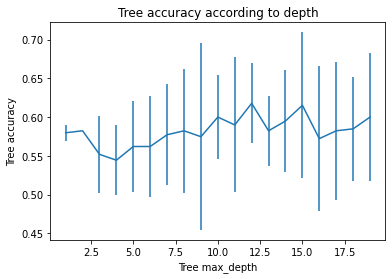

In [38]:
#show chart with error bars for each max_depth
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
ax.set_xlabel("Tree max_depth")
ax.set_ylabel("Tree accuracy")
ax.set_title("Tree accuracy according to depth")
plt.show()

In [ ]:
#We conclude that max_depth more than 11 doesnt necessarily increase the tree accuracy